In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
df_unprocessed = pd.read_json("yelp_academic_dataset_business.json", lines=True)
print(df_unprocessed.head)

<bound method NDFrame.head of                                                   address  \
0                                       1314 44 Avenue NE   
1                                                           
2                                     1335 rue Beaubien E   
3                                         211 W Monroe St   
4                                     2005 Alyth Place SE   
5                         20235 N Cave Creek Rd, Ste 1115   
6                                          631 Bloor St W   
7                             3417 Derry Road E, Unit 103   
8                                      1440 N. Dysart Ave   
9                                         209 Oakland Ave   
10                                       4568 Highway 7 E   
11                                     595 Markham Street   
12                                        2801 N 15th Ave   
13                                4216 Saint-Laurent Boul   
14                                      4404 14 Street 

In [12]:
print(df_unprocessed.columns)

Index(['address', 'attributes', 'business_id', 'categories', 'city', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'neighborhood',
       'postal_code', 'review_count', 'stars', 'state'],
      dtype='object')


In [14]:
# percentage of open businesses
len(df_unprocessed[df_unprocessed['is_open']==0])/len(df_unprocessed)

0.16960862810390628

Text(0,0.5,'Total Number of Businesses')

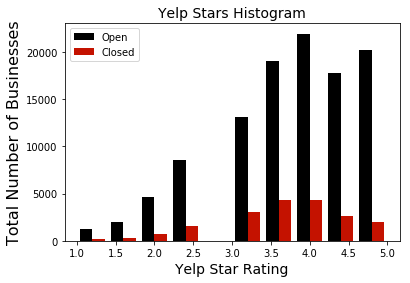

In [13]:
# graphing relationship between open/closed businesses and star rating
plt.hist([df_unprocessed[df_unprocessed['is_open']==1].dropna()['stars'].values,\
          df_unprocessed[df_unprocessed['is_open']==0].dropna()['stars'].values],\
        label=['Open','Closed'],color=['k','#c41200'])


plt.legend()
plt.title('Yelp Stars Histogram',fontsize=14)
plt.xlabel('Yelp Star Rating',fontsize=14)
plt.ylabel('Total Number of Businesses',fontsize=16)

# Most of the businesses in the data are open. 17% of the businesses are closed.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Integral Value')

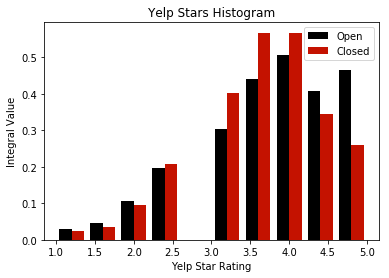

In [11]:
# normalizing the above graph
plt.hist([df_unprocessed[df_unprocessed['is_open']==1].dropna()['stars'].values,\
          df_unprocessed[df_unprocessed['is_open']==0].dropna()['stars'].values],\
        label=['Open','Closed'],color=['k','#c41200'],normed=True)


plt.legend()
plt.title('Yelp Stars Histogram')
plt.xlabel('Yelp Star Rating')
plt.ylabel('Integral Value')

Text(0,0.5,'Percentages per Category (%)')

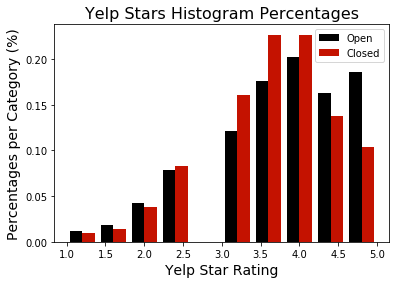

In [15]:
# graphing the percentages of stars crossed with open/closed status
open_length = len(df_unprocessed[df_unprocessed['is_open']==1].dropna()['stars'])
closed_length = len(df_unprocessed[df_unprocessed['is_open']==0].dropna()['stars'])
weights = [np.ones(open_length)/open_length,np.ones(closed_length)/closed_length]
plt.hist([df_unprocessed[df_unprocessed['is_open']==1].dropna()['stars'].values,\
          df_unprocessed[df_unprocessed['is_open']==0].dropna()['stars'].values],\
        label=['Open','Closed'],color=['k','#c41200'],weights=weights)


plt.legend()
plt.title('Yelp Stars Histogram Percentages',fontsize=16)
plt.xlabel('Yelp Star Rating',fontsize=14)
plt.ylabel('Percentages per Category (%)',fontsize=14)

# we see an interesting switch here where there are more closed businesses with 2.5, 3, 3.5, and 4 star ratings. There are more businesses with the other ratings that are open. Why is that?

Text(0.5,0,'Total Number of Reviews')

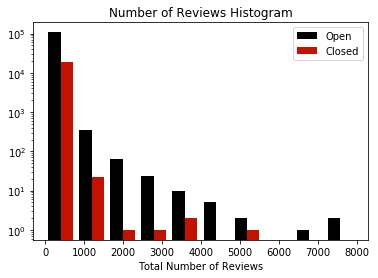

In [16]:
plt.hist([df_unprocessed[df_unprocessed['is_open']==1].dropna()['review_count'].values,\
          df_unprocessed[df_unprocessed['is_open']==0].dropna()['review_count'].values],\
        label=['Open','Closed'],color=['k','#c41200'],log=True)


plt.legend()
plt.title('Number of Reviews Histogram')
plt.xlabel('Total Number of Reviews')

# linear relationship between number of reviews and open/closed status. 

In [31]:
df_ml = df_unprocessed[['is_open', 'latitude', 'longitude', 'review_count', 'stars']]

In [20]:
print(len(df_ml))

188593


In [32]:
df_ml_clean = df_ml.dropna(axis = 0)

In [22]:
print(len(df_ml_clean))

188586


In [33]:
# we lost 7 values by droppign the NaN rows. Let's check if the percentages of closed restaurants has changed.
print(len(df_ml_clean[df_ml_clean['is_open']==0])/len(df_ml_clean))

0.16960431845418006


In [34]:
# Split in features and target
df_ml_features = df_ml_clean.drop('is_open',axis = 1)
df_ml_target = df_ml_clean['is_open']

In [35]:
print(df_ml_features)

         latitude   longitude  review_count  stars
0       51.091813 -114.031675            24    4.0
1       35.960734 -114.939821             3    4.5
2       45.540503  -73.599300             5    4.0
3       33.449999 -112.076979             8    1.5
4       51.035591 -114.027366             4    2.0
5       33.671375 -112.030017            63    4.0
6       43.664378  -79.414424             7    4.0
7       43.712946  -79.632763             7    2.0
8       33.448106 -112.341302            40    2.5
9       40.441421  -79.956457             3    3.5
10      43.862484  -79.306960            12    1.5
11      43.664125  -79.411886           146    4.0
12      33.479807 -112.091188           277    4.0
13      45.518036  -73.582174            19    3.5
14      51.091857 -114.094625             3    4.5
15      51.042469 -114.139574             4    2.5
16      45.507699  -73.553407            12    3.5
17      36.178348 -115.176916             4    4.0
18      36.188386 -115.186124  

In [28]:
# Try different classification techniques
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

clf = LogisticRegression(random_state=0)
clf_A = GaussianNB()
clf_B = DecisionTreeClassifier(random_state=1)
clf_C = GradientBoostingClassifier(random_state=1)
clf_D = RandomForestClassifier(random_state=1)

In [36]:
# Let's split the dataset on training and test set and then apply check how the above algorithms perform.
X_train, X_test, y_train, y_test = train_test_split(df_ml_features, df_ml_target, test_size = 0.2, random_state = 10,\
                                                    stratify = df_ml_target)

In [37]:
clf.fit(X_train,list(y_train.values))
y_pred = clf.predict(X_test)
print('Accuracy: ',clf.score(X_test,list(y_test.values)))
print('Precision: ',precision_score(list(y_test.values),y_pred))
print('Recall: ',recall_score(list(y_test.values),y_pred))
print('F1 Score: ',f1_score(list(y_test.values),y_pred))
print('Confusion Matrix: \n',confusion_matrix(list(y_test.values), y_pred))

Accuracy:  0.8303992788589003
Precision:  0.8303992788589003
Recall:  1.0
F1 Score:  0.9073422268572836
Confusion Matrix: 
 [[    0  6397]
 [    0 31321]]


In [38]:
clf_A.fit(X_train,list(y_train.values))
y_pred_A = clf_A.predict(X_test)
print('Accuracy: ',clf_A.score(X_test,list(y_test.values)))
print('Precision: ',precision_score(list(y_test.values),y_pred_A))
print('Recall: ',recall_score(list(y_test.values),y_pred_A))
print('F1 Score: ',f1_score(list(y_test.values),y_pred_A))
print('Confusion Matrix: \n',confusion_matrix(list(y_test.values), y_pred_A))

Accuracy:  0.8303992788589003
Precision:  0.8303992788589003
Recall:  1.0
F1 Score:  0.9073422268572836
Confusion Matrix: 
 [[    0  6397]
 [    0 31321]]


In [39]:
clf_B.fit(X_train,list(y_train.values))
y_pred_B = clf_B.predict(X_test)
print('Accuracy: ',clf_B.score(X_test,list(y_test.values)))
print('Precision: ',precision_score(list(y_test.values),y_pred_B))
print('Recall: ',recall_score(list(y_test.values),y_pred_B))
print('F1 Score: ',f1_score(list(y_test.values),y_pred_B))
print('Confusion Matrix: \n',confusion_matrix(list(y_test.values), y_pred_B))

Accuracy:  0.7366244233522456
Precision:  0.8460567619170901
Recall:  0.8347115353915903
F1 Score:  0.8403458583780656
Confusion Matrix: 
 [[ 1640  4757]
 [ 5177 26144]]


In [40]:
clf_C.fit(X_train,list(y_train.values))
y_pred_C = clf_C.predict(X_test)
print('Accuracy: ',clf_C.score(X_test,list(y_test.values)))
print('Precision: ',precision_score(list(y_test.values),y_pred_C))
print('Recall: ',recall_score(list(y_test.values),y_pred_C))
print('F1 Score: ',f1_score(list(y_test.values),y_pred_C))
print('Confusion Matrix: \n',confusion_matrix(list(y_test.values), y_pred_C))

Accuracy:  0.8303992788589003
Precision:  0.8303992788589003
Recall:  1.0
F1 Score:  0.9073422268572836
Confusion Matrix: 
 [[    0  6397]
 [    0 31321]]


In [41]:
clf_D.fit(X_train,list(y_train.values))
y_pred_D = clf_D.predict(X_test)
print('Accuracy: ',clf_D.score(X_test,list(y_test.values)))
print('Precision: ',precision_score(list(y_test.values),y_pred_D))
print('Recall: ',recall_score(list(y_test.values),y_pred_D))
print('F1 Score: ',f1_score(list(y_test.values),y_pred_D))
print('Confusion Matrix: \n',confusion_matrix(list(y_test.values), y_pred_D))

Accuracy:  0.7888806405429768
Precision:  0.8435606283461787
Recall:  0.9155518661600843
F1 Score:  0.878083135573758
Confusion Matrix: 
 [[ 1079  5318]
 [ 2645 28676]]


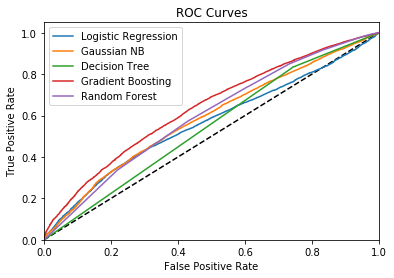

In [42]:
# For better comparison between the models let's draw the ROC curves
y_score = clf.decision_function(X_test)
y_score_A = clf_A.predict_proba(X_test)[:,1]
y_score_B = clf_B.predict_proba(X_test)[:,1]
y_score_C = clf_C.decision_function(X_test)
y_score_D = clf_D.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test.values,y_score)
fpr_A, tpr_A, _ = roc_curve(y_test.values,y_score_A)
fpr_B, tpr_B, _ = roc_curve(y_test.values,y_score_B)
fpr_C, tpr_C, _ = roc_curve(y_test.values,y_score_C)
fpr_D, tpr_D, _ = roc_curve(y_test.values,y_score_D)
plt.plot([0,1],[0,1],'k--')

plt.plot(fpr,tpr,label='Logistic Regression')
plt.plot(fpr_A,tpr_A,label='Gaussian NB')
plt.plot(fpr_B,tpr_B,label='Decision Tree')
plt.plot(fpr_C,tpr_C,label='Gradient Boosting')
plt.plot(fpr_D,tpr_D,label='Random Forest')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

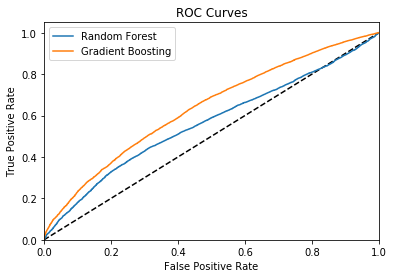

In [43]:
fpr_D, tpr_D, _ = roc_curve(y_test.values,y_score)
fpr_C, tpr_C, _ = roc_curve(y_test.values,y_score_C)

plt.plot([0,1],[0,1],'k--')

plt.plot(fpr_D,tpr_D,label='Random Forest')

plt.plot(fpr_C,tpr_C,label='Gradient Boosting')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

In [44]:
# Let's rank the features in terms of importance
importances = clf_D.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_D.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")

for f in range(X_test.shape[1]):
    print("%d. feature: %s (%f)" % (f + 1, df_ml_features.iloc[:,indices[f]].name, importances[indices[f]]))
    #print("%d. feature: %s (%f)" % (f + 1, df_ml_features.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature: longitude (0.393116)
2. feature: latitude (0.391470)
3. feature: review_count (0.154797)
4. feature: stars (0.060618)


In [46]:
print(df_ml_features.columns)

Index(['latitude', 'longitude', 'review_count', 'stars'], dtype='object')


In [47]:
# Labels to be used for feature importance, same order as column labels
labels = ['latitude', 'longitude', 'review_count', 'stars']
len(labels)

4

(-1, 4)

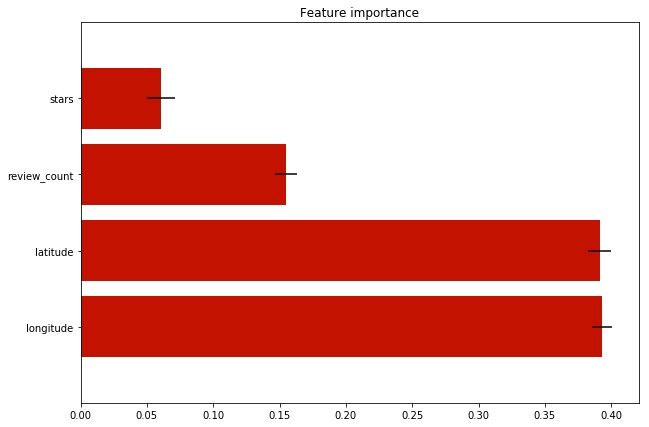

In [48]:
# Random forest
plt.figure(figsize=(10,7))
plt.title("Feature importance")
plt.barh(range(X_test.shape[1]), importances[indices],
       color="#c41200", xerr=std[indices], align="center")
#plt.yticks(range(X_test.shape[1]), df_ml_features.iloc[:,indices].columns)
plt.yticks(range(X_test.shape[1]), [labels[i] for i in indices])
plt.ylim([-1, X_test.shape[1]])

In [49]:
# Gradient Boosting importances
importances2 = clf_C.feature_importances_
#std2 = np.std([tree.feature_importances_ for tree in clf_C.estimators_],axis=0)
indices2 = np.argsort(importances2)[::-1]
# Print the feature ranking
print("Feature ranking:")

for f in range(X_test.shape[1]):
    print("%d. feature: %s (%f)" % (f + 1, df_ml_features.iloc[:,indices2[f]].name, importances2[indices2[f]]))
    #print("%d. feature: %s (%f)" % (f + 1, df_ml_features.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature: longitude (0.405156)
2. feature: latitude (0.239481)
3. feature: stars (0.213337)
4. feature: review_count (0.142026)


(-1, 4)

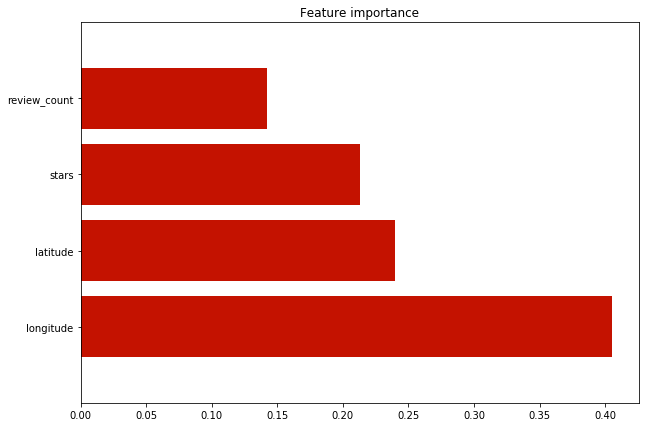

In [50]:
# Gradient boosting
% matplotlib inline
plt.figure(figsize=(10,7))
plt.title("Feature importance")
plt.barh(range(X_test.shape[1]), importances2[indices2],
       color="#c41200", align="center")
#plt.yticks(range(X_test.shape[1]), df_ml_features.iloc[:,indices].columns)
plt.yticks(range(X_test.shape[1]), [labels[i] for i in indices2])
plt.ylim([-1, X_test.shape[1]])

latitude and longitude seem to play pretty important parts in this. let's see if we can't parse this out a bit